<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> First section : Data cleaning  </center>

In this notebook you will be cleaning your dataset and making sure it's fully ready for modeling.

The used dataset is [Hepatitis C  dataset](https://www.kaggle.com/fedesoriano/hepatitis-c-dataset)

## Data preparation 
As a first step we need to prepare the data :

1. Read the data set as a data frame ( file name is HepatitisCdata.csv) 
2. The here are the column of your dataset:
    1) X (Patient ID/No.)
    2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') ( the target ) 
    3) Age (in years)
    4) Sex (f,m)
    Attributes 5 to 14 refer to laboratory data:
    5) ALB : Albumin Blood Test
    6) ALP : Alkaline phosphatase
    7) ALT : Alanine Transaminase
    8) AST : Aspartate Transaminase
    9) BIL : Bilirubin
    10) CHE : Acetylcholinesterase
    11) CHOL : Cholesterol
    12) CREA : Creatinine 
    13) GGT : Gamma-Glutamyl Transferase
    14) PROT : Proteins
    
3. Remember your model only accepts numbers so make sure you deal properly with the missing values and the data types and justify your solution choices 
 
4. Make sure the dataset shape in the end is : rows 615 and  14 columns 
 
5. Once finished save the cleaned dataset as "clean_HepatitisC.csv" file 
 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
#To-Do: read the dataset 
data = pd.read_csv("HepatitisCdata.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
#To-Do  Start investigating the data types and correcting that 
# Provide explanation about each step in Markdown cells 
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


There are two non-numeric features: 'Categoty' and 'Sex'. We will check their unique values and convert them into numerical ones.

In [5]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

There 4 categorical values in the column 'Category', thus they are replaced with numerical ordinal values:
<br>0: Blood Donor 
<br>1: suspect Blood Donor 
<br>2: Hepatitis 
<br>3: Fibrosis
<br>4: Cirrhosis

In [6]:
data['Category'].replace(['0=Blood Donor', '0s=suspect Blood Donor','1=Hepatitis','2=Fibrosis','3=Cirrhosis'],
                         [0, 1, 2, 3, 4], inplace=True)

In [7]:
data.Sex.unique()

array(['m', 'f'], dtype=object)

There are 2 categorical values for the gender column, they are replaced with numerical ordinal values:
<br>0: male
<br>1: female

In [8]:
data['Sex'].replace(['m', 'f'],[0, 1], inplace=True)

In [9]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


> Data types are all numeric Now ! Next we need to deal with missing values for the feature columns 

#To-Do list all the columns that contain missing values along with their counts 

In [10]:
# To-Do Start providing solutions for each column that has missing data 
# Treat each case seperately 
# Hint : no data row should be deleted 
# Provide evidence that you filled those missing values after each step 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
data.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

<AxesSubplot:>

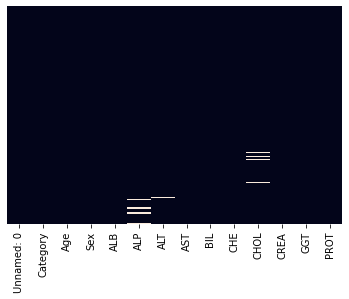

In [13]:
# Visualizing the missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

There isn't much missing data in our dataframe as we can see.

Text(0.5, 0, 'PROT')

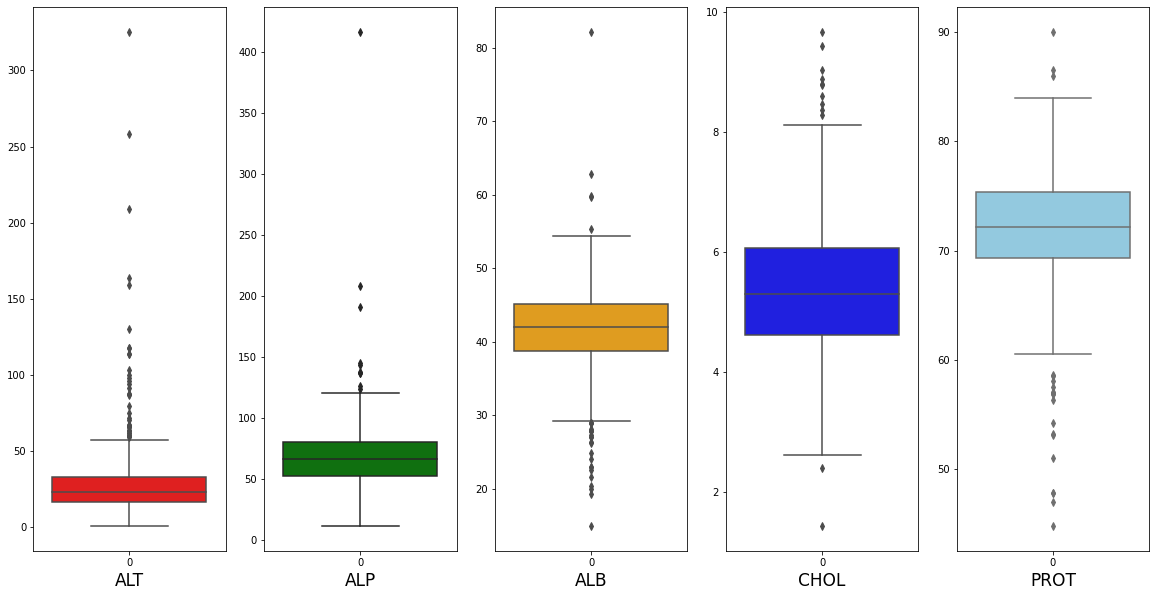

In [14]:
# Outliers Identification using Boxplot
fig, axes = plt.subplots(1, 5, figsize=(20,10))
sns.boxplot( data=data['ALT'], ax=axes[0], color='red').set_xlabel("ALT",fontsize=17)
sns.boxplot( data=data['ALP'], ax=axes[1], color='green').set_xlabel("ALP",fontsize=17)
sns.boxplot( data=data['ALB'], ax=axes[2], color='orange').set_xlabel("ALB",fontsize=17)
sns.boxplot( data=data['CHOL'], ax=axes[3], color='blue').set_xlabel("CHOL",fontsize=17)
sns.boxplot( data=data['PROT'], ax=axes[4], color='skyblue').set_xlabel("PROT",fontsize=17)

Since there are **outliers** in all the previously plotted features, it is advised not to use the mean to replace missing values 
because it is highly susceptible to outliers. So replacement will be using either the **median** or the **mode**.

When the data is **skewed**, it is good to consider using the **median** value for replacing the missing values.


In [15]:
print('skewness value of ALB: ',data['ALB'].skew())
print('skewness value of ALP: ',data['ALP'].skew())
print('skewness value of ALT: ',data['ALT'].skew())
print('skewness value of CHOL: ',data['CHOL'].skew())
print('skewness value of PROT: ',data['PROT'].skew())

skewness value of ALB:  -0.17676758913402804
skewness value of ALP:  4.654920650234635
skewness value of ALT:  5.506113537258191
skewness value of CHOL:  0.37582755477046126
skewness value of PROT:  -0.9636873886414515


From the results found above, the following can be concluded:
<br>Missing values of **ALP** and **ALT** and **PROT** will be replaced by their respective **median** values due to their **skewness**.
<br>Missing values of **ALB** and **CHOL** will be replaced with their respective **mode** values.

In [16]:
print("ALP median value: ", data['ALP'].median())
data['ALP'] = data['ALP'].fillna(data['ALP'].median())
print("ALT median value: ", data['ALT'].median())
data['ALT'] = data['ALT'].fillna(data['ALT'].median())
print("PROT median value: ", data['PROT'].median())
data['PROT'] = data['PROT'].fillna(data['PROT'].median())

ALP median value:  66.2
ALT median value:  23.0
PROT median value:  72.2


In [17]:
print("ALB mode value:")
print(data['ALB'].mode())
print()
print("CHOL modes are:")
print(data['CHOL'].mode())

ALB mode value:
0    39.0
Name: ALB, dtype: float64

CHOL modes are:
0    5.07
1    5.10
Name: CHOL, dtype: float64


Since the two CHOL modes are close, the first one is chosen to replace the mising values in the CHOL column.

In [18]:
data['ALB'] = data['ALB'].fillna(data['ALB'].mode()[0])
data['CHOL'] = data['CHOL'].fillna(data['CHOL'].mode()[0])

In [19]:
# Last check for the dataset values after changements, as well as the shape
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [20]:
data.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

> We have no more missing data
As an optional thing we can also rename the first column as 'index' or "ID" instead of Unnamed 

In [21]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [22]:
data.rename(columns={'Unnamed: 0': "ID"}, inplace=True)

In [23]:
data.columns

Index(['ID', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
       'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

### 6. Save the clean dataset :

In [24]:
# Don't forget to drop the index 
data.to_csv('clean_HepatitisCdata.csv',index=False)